In [1]:
import matplotlib.pyplot as plt

In [2]:
class GradienteDescendente:
    def __init__(self, x, real, m, b, l):
        self.x, self.real, self.m, self.b, self.l = x, real, m, b, l
        self.v = self.reta()
        
    def reg(self, x):
        return self.m*x+self.b
    
    def reta(self):
        return [self.reg(i) for i in self.x] 

    def fn_custo(self):
        return sum([(i-j)**2 for i, j in zip(self.v, self.real)])

    def derivada_custo_m(self):
        return sum([(i[0] - i[1])*2*x*self.l for i, x in zip(zip(self.v, self.real), x)])
    
    def derivada_custo_b(self):
        return sum([(i[0] - i[1])*2*self.l for i in zip(self.v, self.real)])
    
    def ajusta_mb(self):
        self.m = self.m - self.derivada_custo_m()
        self.b = self.b - self.derivada_custo_b()
    
    def plot(self):
        plt.scatter(self.x, self.real)
        plt.plot(self.x, self.v)


In [72]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13]
real = [1,3,3,2,5,2,5,7,8,7,10,9,12]
l = 0.001
m, b = 0.2, 2

In [73]:
g = GradienteDescendente(x, real, m, b, l)

In [74]:
print(g.m, g.b)

0.2 2


19.143723295252187 19.143733266925537
840


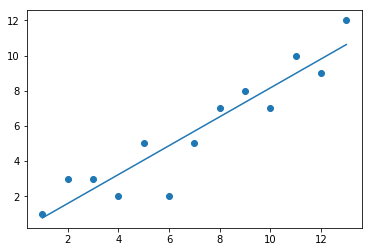

In [75]:
custo_ant = 10
i = 1
while True:
    g.ajusta_mb()
    g.v = g.reta()
    custo = g.fn_custo()
    if abs(custo-custo_ant) < 0.00001:
        print(custo, custo_ant)
        print(i)
        break
    else:
        custo_ant = custo
        i+=1
    
g.plot()


In [76]:
print(g.m, g.b)

0.8222452089147758 -0.059608078934319964


In [77]:
# Regressão

In [78]:
def media(v):
    return sum(i for i in v)/len(v)

In [79]:
def regressao(x, y):
    mx, my = media(x), media(y)
    sxy = sum([i*j for i, j in zip(x,real)])-len(x)*mx*my
    sxx = sum([i**2 for i in x])-len(x)*mx**2
    m = sxy/sxx
    b = my - m*mx
    return m, b

In [80]:
m, b = regressao(x, real)

In [81]:
def reg(m, b, x):
    return m*x+b

In [82]:
def reta(m, b, x):
    return [reg(m, b, i) for i in x] 

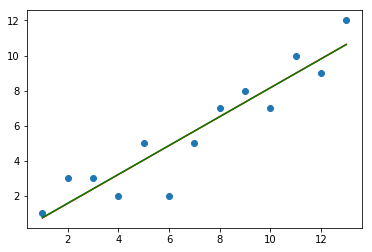

In [89]:
plt.scatter(x, real)
plt.plot(x, reta(m, b, x), color='r')
plt.plot(x, reta(g.m, g.b, x), color='g')

In [91]:
m, g.m, b, g.b

(0.8241758241758241,
 0.8222452089147758,
 -0.07692307692307665,
 -0.059608078934319964)

In [92]:
def fn_custo(x, y):
    return sum([(i-j)**2 for i, j in zip(x, y)])

In [93]:
fn_custo(x, reta(m, b, x))

27.857142857142858

In [94]:
fn_custo(x, reta(g.m, g.b, x))

27.852344886756764